In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [15]:
class0 = np.random.normal(0, 1, (200, 2))
class0[:, 0] += class0[:, 1]
class0 += np.array([2, -1])

class1 = np.random.normal(0, 1, (200, 2))
class1[:, 0] += class1[:, 1]

data = np.vstack((class0, class1))
label = np.vstack((np.zeros((200, 1)), np.ones((200, 1)))).flatten()

In [16]:
accs = []
for s in np.linspace(0, 1, 100, endpoint=True):
    mdl = LDA(solver="eigen", shrinkage=s)
    tmp_accs = []
    for _ in range(50):
        odr = np.random.permutation(data.shape[0])
        mdl.fit(data[odr[:350], :], label[odr[:350]])
        tmp_accs.append(np.mean(label[odr[350:]] == mdl.predict(data[odr[350:], :])))
    accs.append(np.mean(tmp_accs))

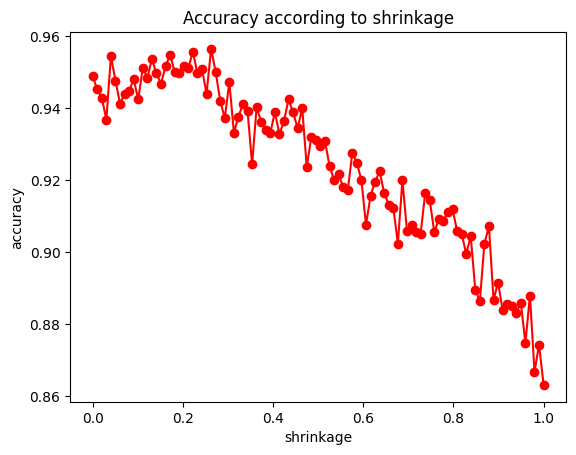

In [17]:
fig, ax = plt.subplots()
ax.set_title("Accuracy according to shrinkage")
ax.set_xlabel("shrinkage")
ax.set_ylabel("accuracy")
ax.plot(np.linspace(0, 1, 100, endpoint=True), accs, 'ro-')
plt.show()